In [1]:
import pandas as pd
import numpy as np
import functools
import seaborn as sns
import scipy
import collections
import itertools
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.stattools as ts
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm

In [2]:
prices_day_0_df = pd.read_csv('../data/round-3-island-data-bottle/prices_round_3_day_0.csv', index_col='timestamp', sep=';')
prices_day_1_df = pd.read_csv('../data/round-3-island-data-bottle/prices_round_3_day_1.csv', index_col='timestamp', sep=';')
prices_day_2_df = pd.read_csv('../data/round-3-island-data-bottle/prices_round_3_day_2.csv', index_col='timestamp', sep=';')

In [3]:
Data_df = pd.concat([prices_day_0_df,prices_day_1_df,prices_day_2_df],axis = 0)

In [28]:
Data_df.head(2)

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
timestamp,,,,,,,,,,,,,,,,
0,0,CHOCOLATE,7999,111,NaN,NaN,NaN,NaN,8001,111,NaN,NaN,NaN,NaN,8000.0,0.0
0,0,STRAWBERRIES,3999,210,NaN,NaN,NaN,NaN,4001,210,NaN,NaN,NaN,NaN,4000.0,0.0


In [34]:
(Data_df.loc[Data_df['product']=='GIFT_BASKET']['bid_price_1'] - Data_df.loc[Data_df['product']=='GIFT_BASKET']['ask_price_1']).mean()

-10.864

In [35]:
(Data_df.loc[Data_df['product']=='CHOCOLATE']['bid_price_1'] - Data_df.loc[Data_df['product']=='CHOCOLATE']['ask_price_1']).mean()

-1.3888333333333334

In [36]:
(Data_df.loc[Data_df['product']=='STRAWBERRIES']['bid_price_1'] - Data_df.loc[Data_df['product']=='STRAWBERRIES']['ask_price_1']).mean()

-1.3869

In [37]:
(Data_df.loc[Data_df['product']=='ROSES']['bid_price_1'] - Data_df.loc[Data_df['product']=='ROSES']['ask_price_1']).mean()

-1.2893

In [39]:
df_gift_basket_all_prices_day_012.head()

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
timestamp,,,,,,,,,,,,,,,,
0,0,GIFT_BASKET,71348,19,71347.0,24.0,NaN,NaN,71362,19,71363.0,24.0,NaN,NaN,71355.0,0.0
100,0,GIFT_BASKET,71344,1,71343.0,12.0,71342.0,20.0,71355,1,71356.0,12.0,71357.0,20.0,71349.5,0.0
200,0,GIFT_BASKET,71344,4,71339.0,1.0,71338.0,14.0,71350,1,71351.0,14.0,71352.0,21.0,71347.0,0.0
300,0,GIFT_BASKET,71345,2,71343.0,11.0,71342.0,29.0,71356,2,71357.0,11.0,71358.0,29.0,71350.5,0.0
400,0,GIFT_BASKET,71336,2,71335.0,13.0,71334.0,25.0,71347,2,71348.0,13.0,71349.0,25.0,71341.5,0.0


In [4]:
df_chocolate_day_012 = Data_df.loc[Data_df['product']=='CHOCOLATE'].rename(columns={'mid_price': 'chocolate_mid_price'})[['day', 'chocolate_mid_price']]
df_strawberries_day_012 = Data_df.loc[Data_df['product']=='STRAWBERRIES'].rename(columns={'mid_price': 'strawberries_mid_price'})[['day', 'strawberries_mid_price']]
df_roses_day_012 = Data_df.loc[Data_df['product']=='ROSES'].rename(columns={'mid_price': 'roses_mid_price'})[['day', 'roses_mid_price']]
df_gift_basket_day_012 = Data_df.loc[Data_df['product']=='GIFT_BASKET'].rename(columns={'mid_price': 'gift_basket_mid_price'})[['day', 'gift_basket_mid_price']]

In [5]:
df_all_mid_prices_day_012 = functools.reduce(lambda left, right: pd.merge(left, right, on=['timestamp', 'day']), 
                                        [df_chocolate_day_012, df_strawberries_day_012, df_roses_day_012, df_gift_basket_day_012])

In [11]:
df_all_mid_prices_day_012.head()

,day,chocolate_mid_price,strawberries_mid_price,roses_mid_price,gift_basket_mid_price,edge_raw,edge_demean
timestamp,,,,,,,
0,0,8000.0,4000.0,15000.0,71355.0,355.0,-24.490483
100,0,8001.5,3999.5,15000.0,71349.5,346.5,-32.990483
200,0,8001.0,3999.5,15000.5,71347.0,345.5,-33.990483
300,0,8002.5,3999.5,15000.0,71350.5,343.5,-35.990483
400,0,8002.0,3999.5,14997.5,71341.5,339.0,-40.490483


In [26]:
df_all_mid_prices_day_012.chocolate_mid_price.mean(), df_all_mid_prices_day_012.strawberries_mid_price.mean(), df_all_mid_prices_day_012.roses_mid_price.mean()

(7915.34725, 4026.83735, 14506.89705)

In [20]:
df_all_mid_prices_day_012.gift_basket_mid_price.mean(), 4*df_all_mid_prices_day_012.chocolate_mid_price.mean()+6*df_all_mid_prices_day_012.strawberries_mid_price.mean()+df_all_mid_prices_day_012.roses_mid_price.mean()

(70708.80063333333, 70329.31015)

In [25]:
70708.80063333333/7915.34725, 70708.80063333333/4026.83735, 70708.80063333333/14506.89705

(8.933126797858847, 17.559388295962172, 4.874150577454697)

In [7]:
df_all_mid_prices_day_012['edge_raw'] = df_all_mid_prices_day_012.apply(lambda row:
        row.gift_basket_mid_price - 4*row.chocolate_mid_price - 6*row.strawberries_mid_price - row.roses_mid_price
        , axis=1)

In [9]:
df_all_mid_prices_day_012['edge_raw'].mean()

379.4904833333333

In [40]:
df_gift_basket_all_prices_day_012 = Data_df.loc[Data_df['product']=='GIFT_BASKET']

In [42]:
df_gift_basket_all_prices_day_012 = df_gift_basket_all_prices_day_012.join(df_all_mid_prices_day_012['edge_raw'])

In [44]:
df_gift_basket_all_prices_day_012['edge_demean'] = df_gift_basket_all_prices_day_012['edge_raw'] - df_gift_basket_all_prices_day_012['edge_raw'].mean()

In [47]:
df_gift_basket_all_prices_day_012['best_bid_mid_price_diff'] = df_gift_basket_all_prices_day_012['bid_price_1'] - df_gift_basket_all_prices_day_012['mid_price']
df_gift_basket_all_prices_day_012['best_ask_mid_price_diff'] = df_gift_basket_all_prices_day_012['ask_price_1'] - df_gift_basket_all_prices_day_012['mid_price']

In [48]:
df_gift_basket_all_prices_day_012['best_bid_mid_price_diff'].mean(), df_gift_basket_all_prices_day_012['best_ask_mid_price_diff'].mean()

(-5.432, 5.432)

In [10]:
df_all_mid_prices_day_012['edge_demean'] = df_all_mid_prices_day_012['edge_raw'] - df_all_mid_prices_day_012['edge_raw'].mean()

<Axes: xlabel='timestamp'>

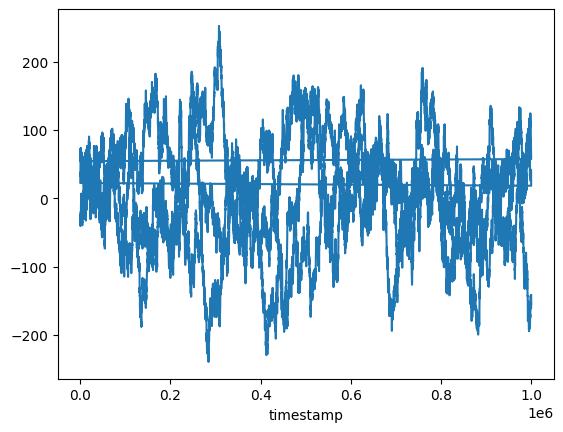

In [12]:
df_all_mid_prices_day_012['edge_demean'].plot()

<Axes: xlabel='edge_demean', ylabel='Density'>

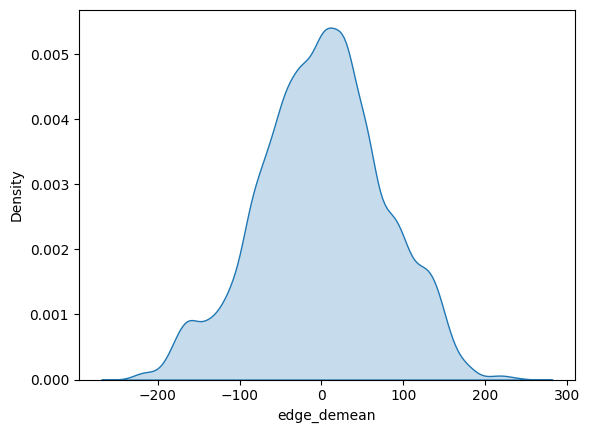

In [13]:
sns.kdeplot(df_all_mid_prices_day_012['edge_demean'], fill=True)

In [16]:
df_all_mid_prices_day_012['edge_demean'].mean(), df_all_mid_prices_day_012['edge_demean'].std()

(3.007395813862483e-14, 76.42438217375009)

In [27]:
df_all_mid_prices_day_012['edge_demean'].min(), df_all_mid_prices_day_012['edge_demean'].max() 

(-239.49048333333332, 252.50951666666668)

### may keep a rolling mean, std, max of the edge in live trading